In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
predicted_labels = np.load("./ndsb_dataset_nounk/predicted_labels_079_valid.npy")
predictions= np.load("./ndsb_dataset_nounk/complete_predictions_079_valid.npy")

real_labels = np.load("./ndsb_dataset_nounk/real_labels_nounk.npy")

In [18]:
data = pd.DataFrame(predictions)

In [19]:
data['max'] = data.apply(max, axis=1)
data['predicted'] = predicted_labels
data['real'] = real_labels

In [20]:
data


,0,1,2,3,4,5,6,7,8,9,...,112,113,114,115,116,117,118,max,predicted,real
0,1.677075e-09,4.786375e-11,3.594240e-09,1.679737e-11,5.938936e-09,1.082488e-07,3.083749e-07,2.532832e-07,5.526845e-09,3.223322e-11,...,4.468440e-09,2.263083e-05,2.476573e-02,9.066468e-07,2.463525e-04,1.641271e-04,9.617066e-10,0.925386,97,97
1,1.567184e-14,1.993533e-16,6.275309e-14,3.610380e-12,7.813677e-04,9.430449e-01,5.525546e-02,1.709206e-06,2.341190e-10,2.494470e-14,...,2.225899e-16,4.877699e-10,4.180376e-07,8.919826e-11,8.229092e-11,1.207656e-10,1.040665e-12,0.943045,5,49
2,4.750972e-10,1.840355e-09,5.639497e-14,3.493094e-07,1.201318e-11,1.466741e-13,4.452224e-14,7.385920e-15,4.755611e-15,2.609627e-17,...,9.035506e-10,2.360619e-15,5.075025e-15,1.020768e-17,2.771237e-15,4.714207e-17,1.859444e-13,0.715322,19,14
3,9.335568e-11,1.511868e-10,2.866828e-14,1.837186e-10,5.490438e-24,1.582572e-22,6.966642e-23,1.030901e-20,1.479869e-17,2.848979e-12,...,8.472863e-17,6.407109e-16,6.492397e-20,3.229468e-19,2.050567e-20,2.013915e-20,2.051638e-21,0.999926,110,110
4,4.064904e-03,4.607418e-05,3.466596e-05,1.939644e-03,2.309766e-05,3.624614e-05,1.877559e-04,1.775351e-03,4.982101e-05,3.479077e-04,...,1.337995e-05,1.945454e-04,2.701508e-04,2.434026e-04,5.457456e-05,7.000696e-06,9.895720e-05,0.368563,40,40
5,3.261704e-09,2.707928e-09,2.616521e-10,2.223398e-09,5.039784e-13,1.788778e-12,1.820158e-13,2.093629e-14,2.836181e-12,1.070309e-10,...,1.027654e-10,4.347388e-11,3.532419e-12,2.577688e-12,8.786967e-13,1.260941e-12,2.779824e-12,0.906829,108,108
6,2.715993e-12,1.141146e-12,3.525836e-11,1.818569e-08,7.507538e-03,7.393528e-01,2.443140e-01,1.681261e-04,9.768556e-10,2.981916e-12,...,3.084963e-12,5.712763e-05,1.001441e-03,2.173897e-06,1.878165e-06,6.158702e-08,3.778100e-10,0.739353,5,5
7,1.230486e-10,4.251572e-10,2.861281e-11,4.495314e-05,4.418740e-08,2.641468e-06,6.453687e-07,1.542141e-06,9.837755e-08,1.637173e-08,...,1.713199e-11,8.274187e-06,1.812299e-03,2.865035e-06,4.760930e-05,5.832791e-05,2.474853e-08,0.802781,52,52
8,1.687870e-14,2.475300e-15,3.939676e-15,2.227925e-10,5.283476e-11,6.858855e-10,5.018355e-09,1.566793e-07,4.177242e-13,3.647080e-12,...,2.518264e-15,1.677447e-09,4.227704e-07,9.359078e-10,8.835029e-09,1.201668e-08,1.813965e-11,0.552409,12,11
9,2.447396e-12,2.019884e-13,8.768650e-14,1.326829e-09,2.449489e-11,2.611611e-10,3.473568e-10,3.059835e-10,1.542416e-10,1.281101e-09,...,3.954540e-15,1.020087e-11,4.021100e-11,4.505702e-12,1.484995e-13,1.305044e-11,5.004529e-12,0.973418,111,111


C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


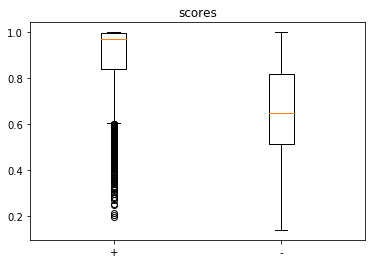

In [21]:
%matplotlib inline
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']]['max']
box_false = data[data['predicted'] != data['real']]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('scores')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


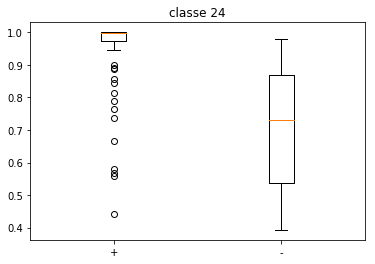

In [10]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 24]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 24]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 24')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


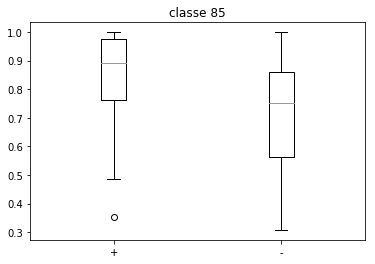

In [11]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 85]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 85]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 85')
    
f.subplots_adjust(hspace=0)
plt.show()


C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


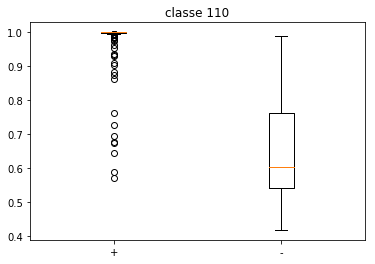

In [15]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 110]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 110]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 110')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


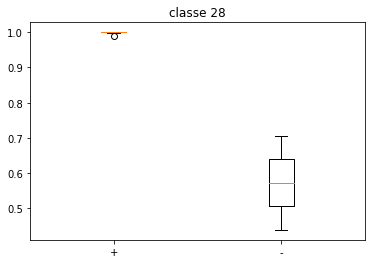

In [13]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 28]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 28]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 28')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


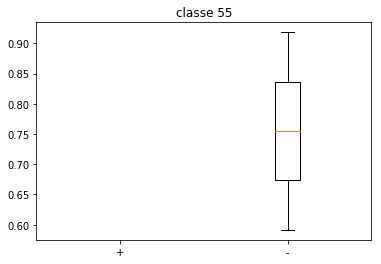

In [24]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 55]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 55]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 55')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


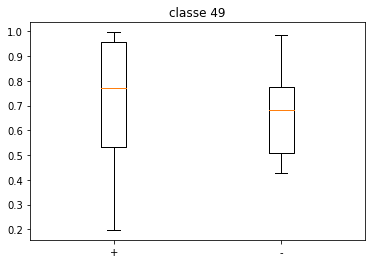

In [28]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 49]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 49]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 49')
    
f.subplots_adjust(hspace=0)
plt.show()

C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\mariv\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mariv\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


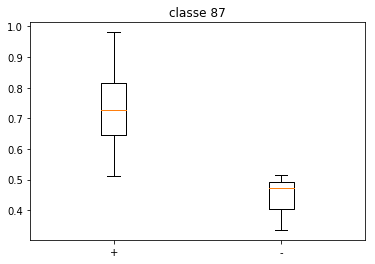

In [29]:
f, a = plt.subplots()
box_true = data[data['predicted'] == data['real']][data['real'] == 87]['max']
box_false = data[data['predicted'] != data['real']][data['real'] == 87]['max']
a.boxplot([box_true, box_false],  labels=['+', '-'])
a.set_title('classe 87')
    
f.subplots_adjust(hspace=0)
plt.show()